In [30]:
import os
import random
import sqlite3
import datetime

import numpy as np
import pandas as pd

In [31]:
con_pharma = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb.sqlite"))

In [33]:
tweet_df = pd.read_sql_query(f"SELECT * from ev_game_tweets_count", con_pharma)

In [34]:
len(tweet_df['tweetDate'].unique())

723

In [35]:
tweet_df.describe()

,count
count,119334.000000
mean,2.517539
std,16.134147
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3922.000000


<AxesSubplot:>

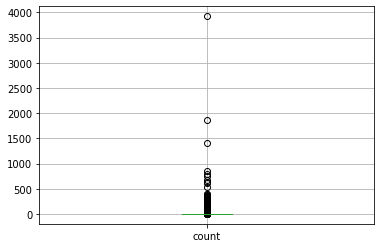

In [36]:
tweet_df.boxplot()

In [38]:
tweet_df = pd.read_sql_query(f"SELECT * from ev_game_tweets_count WHERE category LIKE 'EVs' AND count > 1", con_pharma)

In [39]:
tweet_df.describe()

,count
count,27564.000000
mean,6.273799
std,31.582991
min,2.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,3922.000000


<AxesSubplot:>

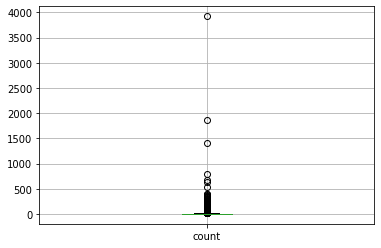

In [40]:
tweet_df.boxplot()

In [41]:
tweet_df['count'] = tweet_df['count'].apply(lambda x: 15 if x > 15 else x) 

In [42]:
tweet_df.describe()

,count
count,27564.000000
mean,4.516507
std,3.768004
min,2.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,15.000000


<AxesSubplot:>

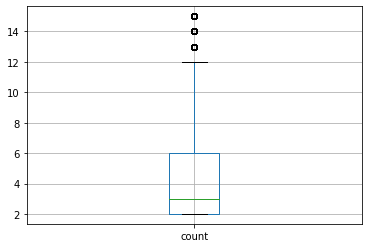

In [43]:
tweet_df.boxplot()

In [44]:
len(tweet_df['tweetDate'].unique())

723

In [45]:
tweet_df['count'].value_counts()

2     13758
3      3681
4      1750
15     1609
10     1593
5      1101
9      1066
8       882
6       830
7       798
12      138
11      137
14      112
13      109
Name: count, dtype: int64

In [111]:
def write_to_db(con, df):
    cursor = con.cursor()
    
    try:
        cursor.execute('''CREATE TABLE IF NOT EXISTS reduced_tweet_counts (
              category TEXT, 
              tweetDate DATE, 
              count INTEGER, 
              tweet TEXT, 
              CONSTRAINT uniq_val PRIMARY KEY (category, tweetDate, tweet))''')
        con.commit()
        
        df.to_sql('reduced_tweet_counts', con, if_exists='replace', index=False)
        con.commit()
        
    except sqlite3.Error as error:
        print({error})
    
    finally:
        cursor.close()
        con.close()

In [112]:
write_to_db(con_pharma, tweet_df)